In [1]:
# Определяем оптимальное количество кластеров 
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
# наши данные - файл experted_data.csv
seeds_df = pd.read_csv(
"./expertdata.txt")
# seeds_df = pd.read_csv(
# "./full_expertdata.txt")

# varieties = list(seeds_df.pop('FirstName')+' '+seeds_df.pop('LastName'))
varieties = list(seeds_df['amountFlights']+seeds_df['travleClass']+seeds_df['foodInfo']+seeds_df['circle']+seeds_df['collapsed']+seeds_df['baggage'])
samples = seeds_df.values
passengers = seeds_df
# # Реализация иерархической кластеризации при помощи функции linkage
# mergings = linkage(samples, method='complete')

# # Строим дендрограмму, указав параметры удобные для отображения
# dendrogram(mergings,
#            labels=varieties,
#            leaf_rotation=90,
#            leaf_font_size=6,
#            )

# plt.show()
print(passengers)



    FirstName    LastName  amountFlights  travleClass  foodInfo  circle  \
0      FILIPP       NOSOV              4            1         1       1   
1       VADIM  RUMIANTSEV              1            1         1       0   
2      SERGEI   ANDRIANOV              4            1         1       0   
3    VERONIKA    TKACHEVA              7            1         1       2   
4        ADEL     BORISOV              2            1         1       0   
..        ...         ...            ...          ...       ...     ...   
485    ROBERT    RIABININ              1            1         0       0   
486     ARTUR   SHESTAKOV              6            1         1       1   
487     RAMIL     NAZAROV              2            1         0       0   
488    RUSTAM    TIMOFEEV             15            1         1       2   
489    MARIIA    ALESHINA              3            0         1       0   

     collapsed  baggage  
0            2        1  
1            0        1  
2            3       

In [3]:
seeds_df.pop('FirstName')
seeds_df.pop('LastName')
points = passengers.values

In [4]:
print(passengers)

     amountFlights  travleClass  foodInfo  circle  collapsed  baggage
0                4            1         1       1          2        1
1                1            1         1       0          0        1
2                4            1         1       0          3        1
3                7            1         1       2          3        1
4                2            1         1       0          2        0
..             ...          ...       ...     ...        ...      ...
485              1            1         0       0          0        0
486              6            1         1       1          3        0
487              2            1         0       0          2        0
488             15            1         1       2         10        1
489              3            0         1       0          3        0

[490 rows x 6 columns]


In [5]:
print(seeds_df)

     amountFlights  travleClass  foodInfo  circle  collapsed  baggage
0                4            1         1       1          2        1
1                1            1         1       0          0        1
2                4            1         1       0          3        1
3                7            1         1       2          3        1
4                2            1         1       0          2        0
..             ...          ...       ...     ...        ...      ...
485              1            1         0       0          0        0
486              6            1         1       1          3        0
487              2            1         0       0          2        0
488             15            1         1       2         10        1
489              3            0         1       0          3        0

[490 rows x 6 columns]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(12)

real_df = pd.read_csv(
"./full_expertdata.txt")
real_df.pop('FirstName')
real_df.pop('LastName')

X = 0.3 * rng.randn(10717, 6) + 1 
X_train = np.r_[X + 6, X - 6]

X = 0.3 * rng.randn(150, 6)
X_test = points

X_outliers = real_df.values

clf = IsolationForest(max_samples=10717, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
# print(X_outliers)
# xx, yy = np.meshgrid(np.linspace(-10, 5, 50), np.linspace(-10, 5, 50))
# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.title("Spy")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
#                  s=20, edgecolor='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
#                  s=20, edgecolor='k')
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
#                 s=20, edgecolor='k')
# plt.axis('tight')
# plt.xlim((0, 50))
# plt.ylim((0, 50))
# plt.legend([b1, b2, c],
#            ["training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left")
# plt.show()

In [11]:
result = list()
for i in range(len(X_outliers)):
    if y_pred_outliers[i] == -1:
        tmp = np.concatenate((X_outliers[i], np.array([1])), axis=0)
        result.append(tmp)
    else:
        tmp = np.concatenate((X_outliers[i], np.array([0])), axis=0)
        result.append(tmp)
result = np.array(result)
print(result)

[[4 1 1 ... 2 1 1]
 [1 1 1 ... 0 1 1]
 [4 1 1 ... 3 1 1]
 ...
 [7 1 1 ... 6 1 1]
 [1 1 1 ... 0 1 1]
 [4 1 0 ... 4 0 1]]


/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


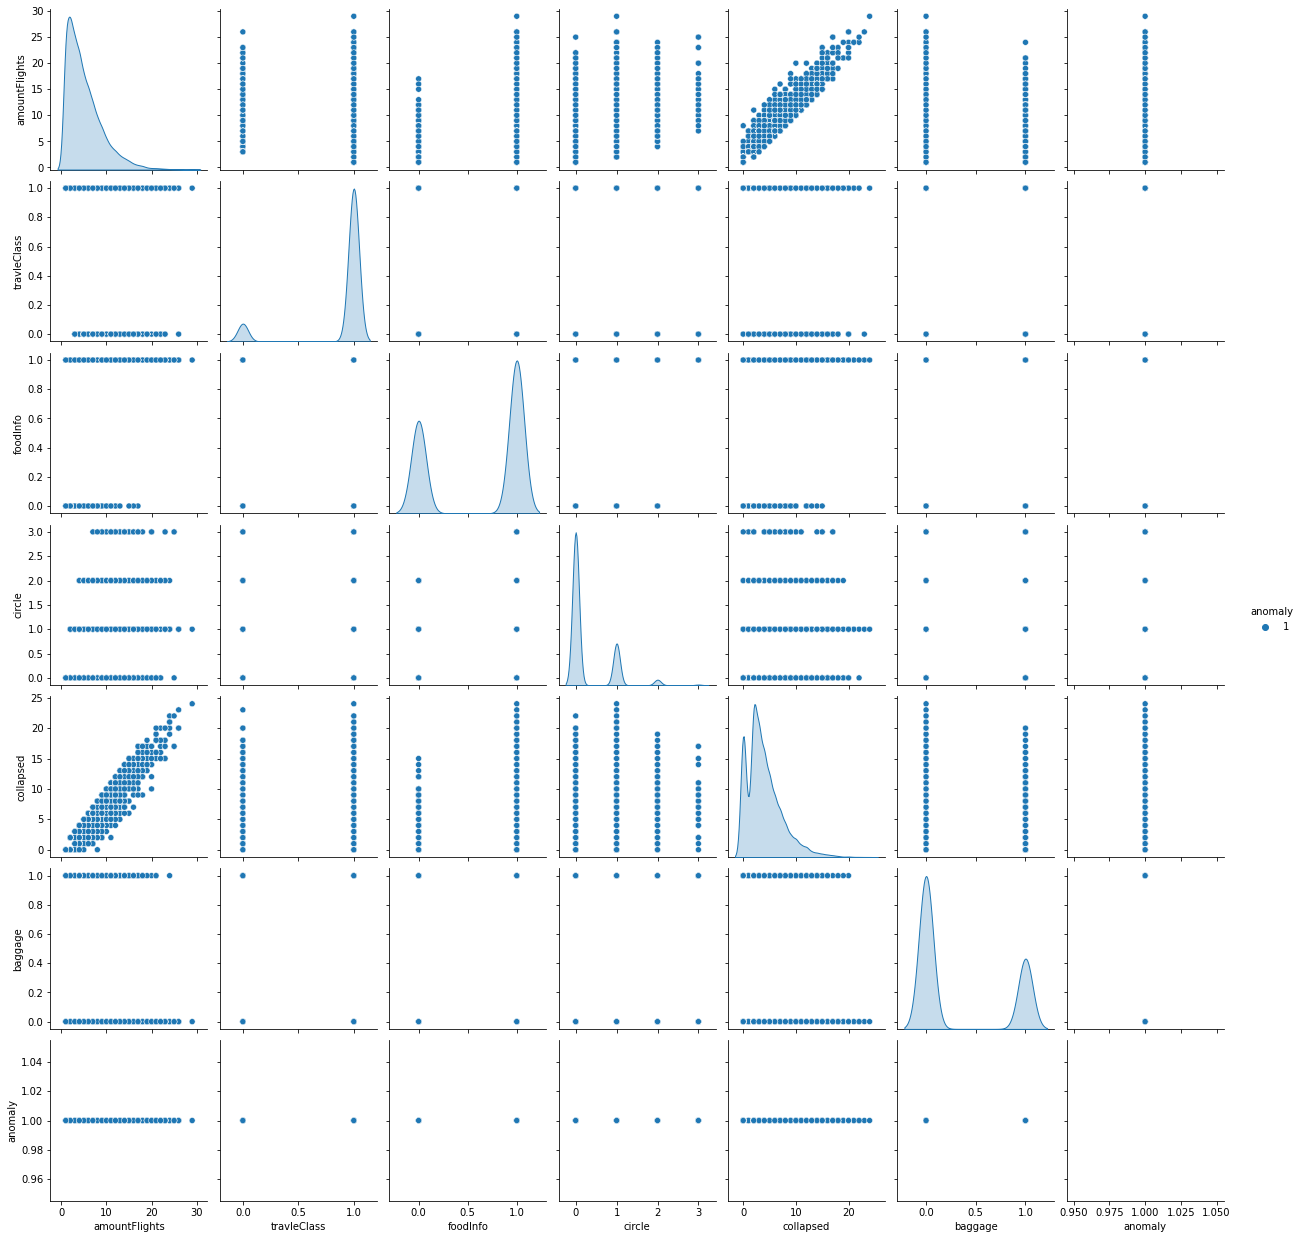

In [19]:
import seaborn as sns
cur_data = pd.DataFrame({'amountFlights': result[:, 0], 'travleClass': result[:, 1], 'foodInfo': result[:,2], 'circle': result[:,3], 'collapsed': result[:,4], 'baggage':result[:,5], 'anomaly': result[:,6]})
g = sns.pairplot(cur_data, diag_kind="kde", vars=['amountFlights','travleClass','foodInfo','circle','collapsed','baggage','anomaly'],hue='anomaly')

In [12]:
# how to save name and last name
# таблицы passengers и seeds_df ссылаются друг на друга почему - то
tmp = passengers[:490]
# print(len(tmp))
tmp_y = y_pred_outliers[:490]
spies = tmp[tmp_y == -1]
normal = tmp[tmp_y == 1]
print(spies)

     amountFlights  travleClass  foodInfo  circle  collapsed  baggage
0                4            1         1       1          2        1
1                1            1         1       0          0        1
2                4            1         1       0          3        1
3                7            1         1       2          3        1
4                2            1         1       0          2        0
..             ...          ...       ...     ...        ...      ...
485              1            1         0       0          0        0
486              6            1         1       1          3        0
487              2            1         0       0          2        0
488             15            1         1       2         10        1
489              3            0         1       0          3        0

[490 rows x 6 columns]


In [24]:
print(result['anomaly' == 1]) # они все аномальные 

[]


In [18]:
model = IsolationForest(contamination=0.001, max_features=0.5)
y_pred = model.fit_predict(seeds_df)

In [19]:
tmp1 = passengers[:490]
spies1 = tmp1[y_pred == -1]
normal1 = tmp1[y_pred == -1]
print(spies1)

    amountFlights  travleClass  foodInfo  circle  collapsed  baggage
39             24            1         1       1         20        1


/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


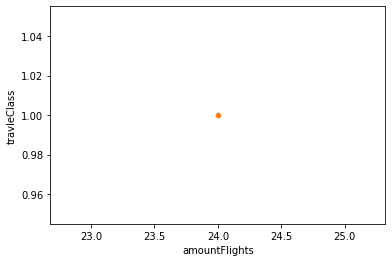

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


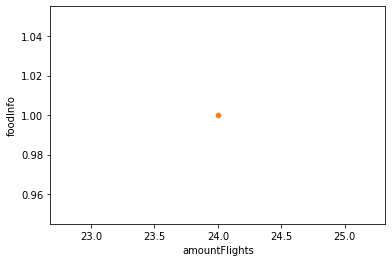

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


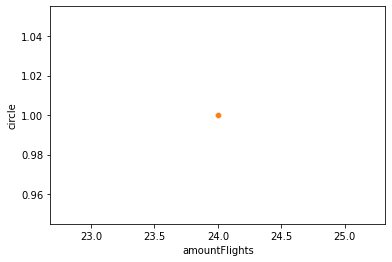

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


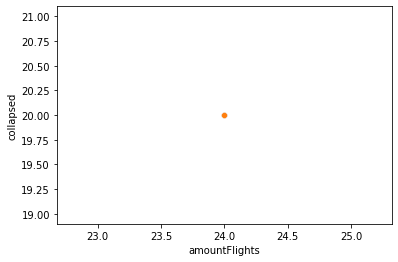

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


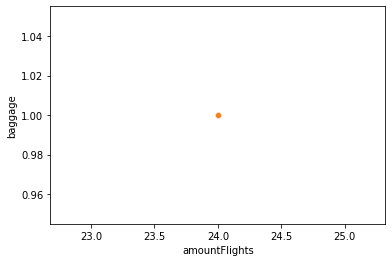

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


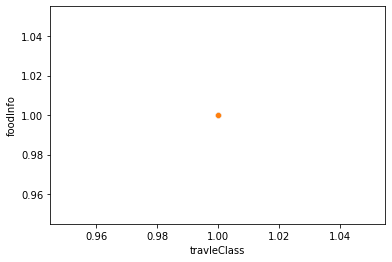

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


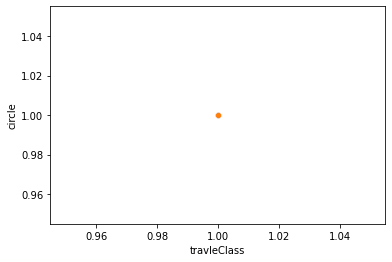

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


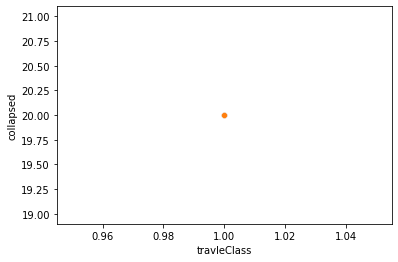

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


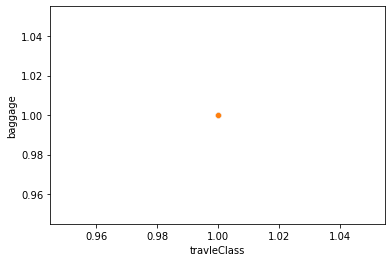

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


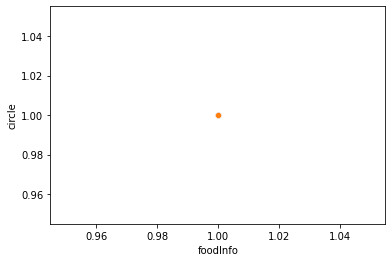

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


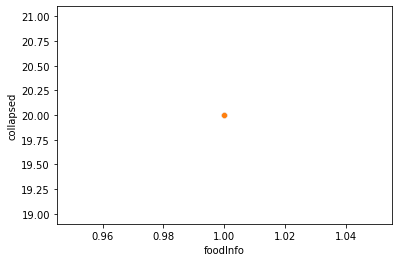

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


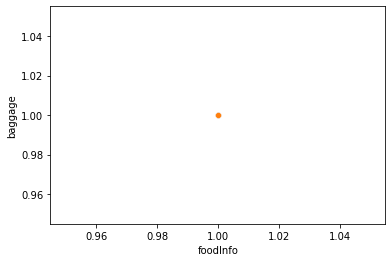

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


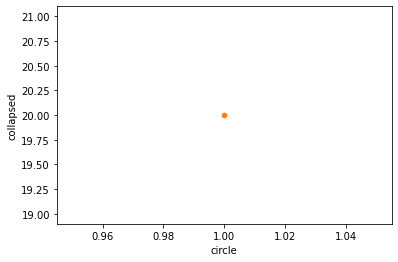

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


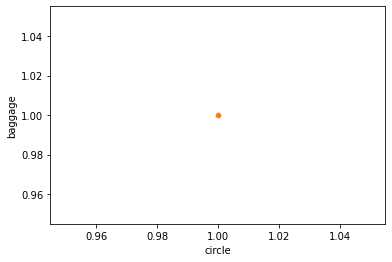

/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/anastasia/Документы/Data_science/ds_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


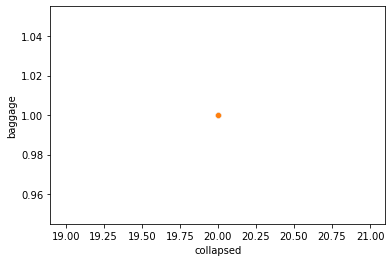

In [26]:
import seaborn as sns
columns =  ['amountFlights',  'travleClass',  'foodInfo',  'circle',  'collapsed',  'baggage']
for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            sns.scatterplot(normal1[columns[i]], normal1[columns[j]])
            sns.scatterplot(spies1[columns[i]], spies1[columns[j]])
            plt.show()

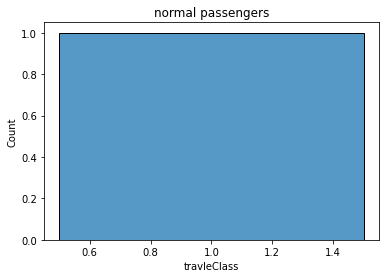

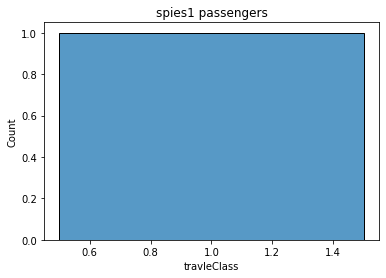

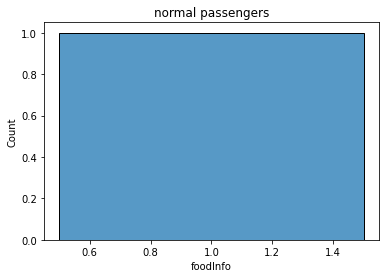

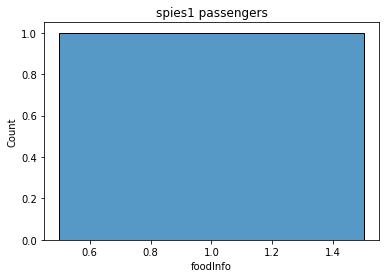

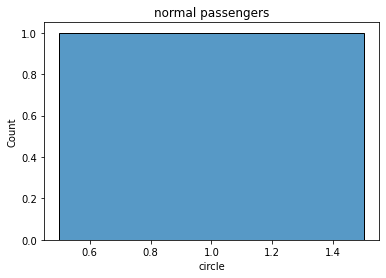

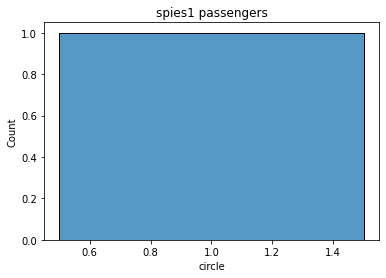

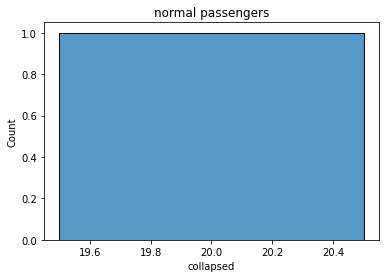

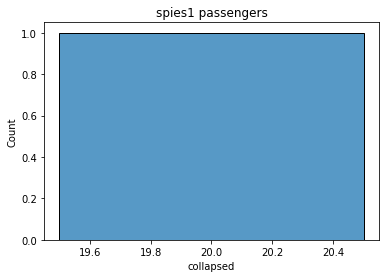

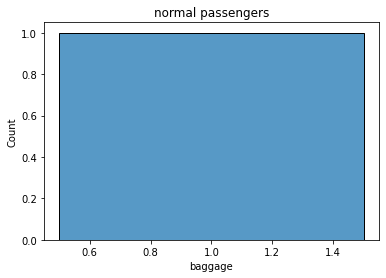

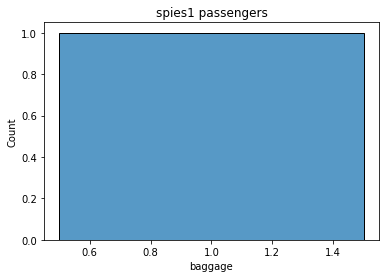

In [29]:
    cols = seeds_df.columns
    for i in range(1, len(cols)):
        sns.histplot(normal1[cols[i]])
        plt.title('normal passengers')
        plt.show()
        sns.histplot(spies1[cols[i]])
        plt.title('spies1 passengers')
        plt.show()